In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load the provided CSV file
file_path = "wildchat_analysis_results.csv"
data = pd.read_csv(file_path)


# Define a function to check if a string represents a list
def is_list(x):
    try:
        return isinstance(ast.literal_eval(x), list)
    except:
        return False


# Apply the function to both columns
domain_is_list = data["Content Domain"].apply(is_list)
service_is_list = data["Types of Service"].apply(is_list)

# Extract rows with lists and unpack the lists into individual rows
expanded_data = pd.DataFrame(columns=data.columns)


# Function to unpack rows with lists into separate rows
def unpack_rows(row):
    domains = (
        ast.literal_eval(row["Content Domain"])
        if is_list(row["Content Domain"])
        else [row["Content Domain"]]
    )
    services = (
        ast.literal_eval(row["Types of Service"])
        if is_list(row["Types of Service"])
        else [row["Types of Service"]]
    )

    new_rows = []
    for domain in domains:
        for service in services:
            new_row = row.copy()
            new_row["Content Domain"] = domain
            new_row["Types of Service"] = service
            new_rows.append(new_row)
    return pd.DataFrame(new_rows)


# Apply the unpacking function to the entire dataframe and concatenate results
expanded_data = pd.concat(
    [unpack_rows(row) for _, row in data.iterrows()], ignore_index=True
)

# Combine with the rows that didn't need unpacking
data_expanded = pd.concat(
    [data[~domain_is_list & ~service_is_list], expanded_data], ignore_index=True
)

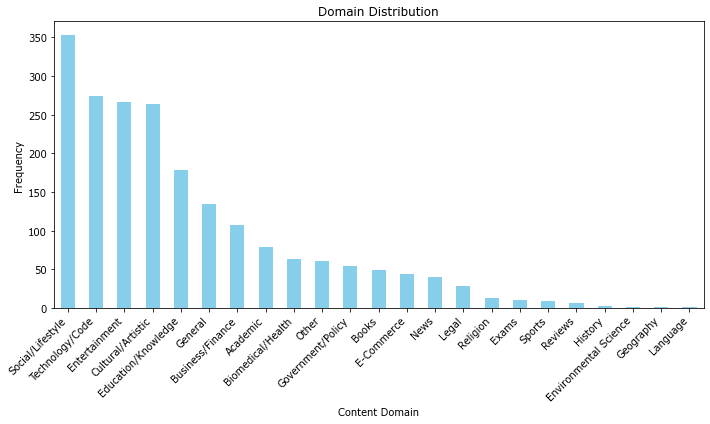

In [30]:
plt.figure(figsize=(10, 6))
domain_counts = data_expanded["Content Domain"].value_counts()
domain_counts.plot(kind="bar", color="skyblue")
plt.title("Domain Distribution")
plt.xlabel("Content Domain")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

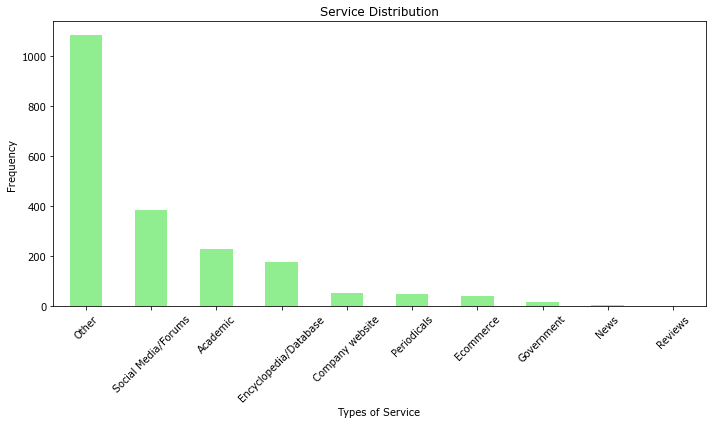

In [28]:
# Plot 2: Service Distribution
plt.figure(figsize=(10, 6))
service_counts = data_expanded['Types of Service'].value_counts()
service_counts.plot(kind='bar', color='lightgreen')
plt.title('Service Distribution')
plt.xlabel('Types of Service')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



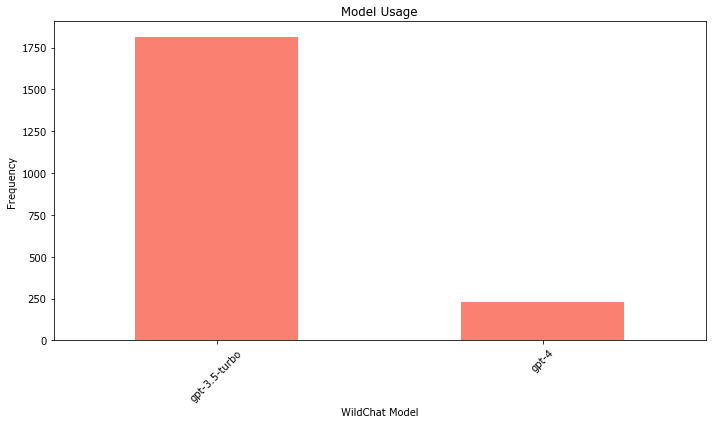

In [29]:
# Plot 3: Model Usage
plt.figure(figsize=(10, 6))
model_counts = data_expanded['WildChat Model'].value_counts()
model_counts.plot(kind='bar', color='salmon')
plt.title('Model Usage')
plt.xlabel('WildChat Model')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()